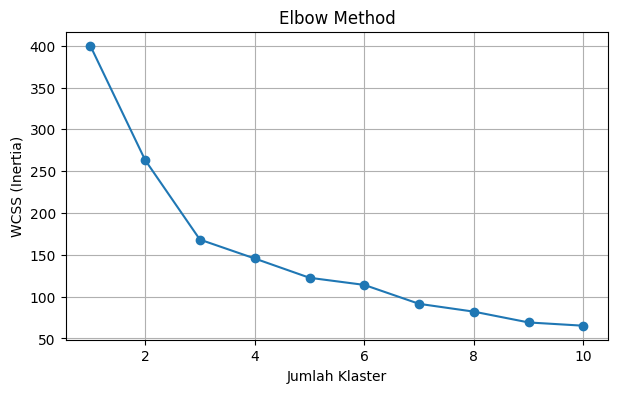

Silhouette Score: 0.31


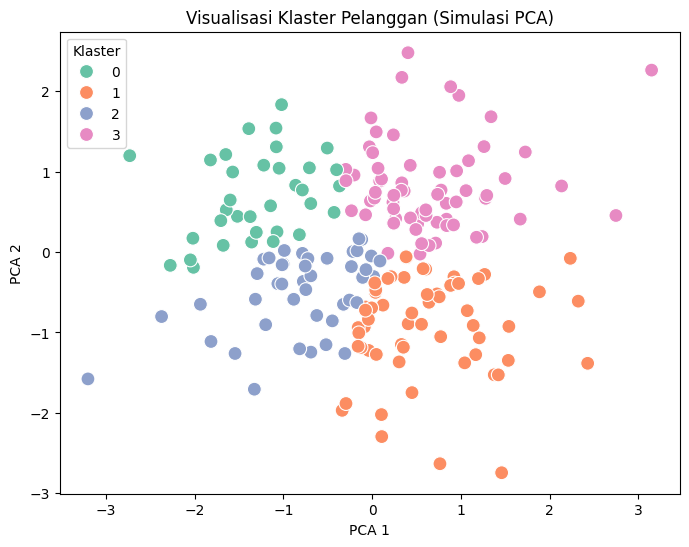

In [1]:
# 1. Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# 2. Simulasi Data Pelanggan
np.random.seed(42)

# Misalnya: 200 pelanggan
income = np.random.normal(50, 15, 200)              # Annual income (rata2 $50k)
spending = np.random.normal(50, 20, 200)            # Spending score (rata2 50)
data = pd.DataFrame({
    'Annual Income (k$)': income,
    'Spending Score (1-100)': spending
})

# 3. Standarisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# 4. Elbow Method
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Klaster")
plt.ylabel("WCSS (Inertia)")
plt.grid()
plt.show()

# 5. KMeans Clustering (jumlah klaster = 4 misalnya)
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_scaled)

# 6. Evaluasi Silhouette Score
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score:.2f}")

# 7. Visualisasi Klaster dengan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set2', s=100)
plt.title("Visualisasi Klaster Pelanggan (Simulasi PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Klaster')
plt.show()
